<a href="https://colab.research.google.com/github/YolandaMDavis/wildtrack-iqa/blob/master/subjective_scoring_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Subjective Performance Analysis

In this notebook we will do a full analysis of subjective scores, first focusing on how well subjective scores performed on on classification tasks and then evaluating instnaces where subjective scoring did not perform well in estimate classification prediction performance. This will serve as our baseline for comparing outcomes in our ML models

## Retrieve Data and Create Dataset

In [2]:
#Only needed to copy data to local drive can be skipped if zip file is already available in working folder
import shutil

# mount google drive
from google.colab import drive
drive.mount('/content/drive') # for google colab. adjust accordingly
PARENT_DIR = '/content/drive/MyDrive/Wildtrack Group/IQA' 

# copy and extract tar file
shutil.copy(PARENT_DIR + '/data/Annotated_Cropped_WildTrack.zip', 'Cropped_WildTrack.zip')

image_file = 'training_image_references.csv'

# copy training feature set 
shutil.copy( PARENT_DIR + '/data/' + image_file, image_file) 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'training_image_references.csv'

In [3]:
from zipfile import ZipFile

# extract image zip file
with ZipFile('Cropped_WildTrack.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [4]:
import pandas as pd
image_file = 'training_image_references.csv'
training_ds = pd.read_csv(image_file)
training_ds.head()

,image_location,species,animal_class,image_name,subj_score,class_performance,feature_0,feature_1,feature_2,feature_3,...,feature_31,feature_32,feature_33,feature_34,feature_35,n_score,p_score,brightness,blurriness,size
0,/content/RAW/Leopard_African_5,Leopard,African,e49aba64d63011eab2300242ac1c0002_.jpg,5,0.0,2.372,0.177100,0.779,0.090218,...,83.225000,9.999,7.845596,0.0,83.120378,14.388488,29.903670,61.866096,117.761213,1877960.0
1,/content/RAW/Rhino_Black_5,Rhino,Black,66a880e4d6af11eab34b0242ac110002_.jpg,5,1.0,3.002,0.607735,0.974,0.087304,...,82.913468,9.999,7.836151,0.0,82.920374,14.007060,27.243571,139.243607,8285.698991,439468.0
2,/content/RAW/Otter_Eurasian_4,Otter,Eurasian,f3a456ba3a4811ebb19d00155d854644_.jpg,4,1.0,2.411,0.244353,0.797,0.093430,...,83.434328,9.999,7.862314,0.0,83.474998,32.577853,7.284321,113.518712,735.995564,358104.0
3,/content/RAW/Lion_African_4,Lion,African,47b2ced28ca911eba36100155dc596e7_.jpg,4,1.0,3.038,0.572334,0.954,0.015062,...,83.173502,9.999,7.843981,0.0,83.086177,9.159867,20.778990,145.391376,10774.350269,395460.0
4,/content/RAW/Leopard_African_4,Leopard,African,ed723f9cc0f811ea82a50242ac1c0002_.jpg,4,0.0,2.732,0.466017,0.884,0.131238,...,82.679333,9.999,7.822266,0.0,82.626776,22.578195,10.923194,124.784673,2290.293279,407943.0


In [5]:
#normalize subjective score to 0 or 1.  4 and higher are 1 and 3 and lower are 0
training_ds.loc[training_ds['subj_score'] >= 4, 'sub_score_norm'] = 1
training_ds.loc[training_ds['subj_score'] < 4, 'sub_score_norm'] = 0
training_ds.head()

,image_location,species,animal_class,image_name,subj_score,class_performance,feature_0,feature_1,feature_2,feature_3,...,feature_32,feature_33,feature_34,feature_35,n_score,p_score,brightness,blurriness,size,sub_score_norm
0,/content/RAW/Leopard_African_5,Leopard,African,e49aba64d63011eab2300242ac1c0002_.jpg,5,0.0,2.372,0.177100,0.779,0.090218,...,9.999,7.845596,0.0,83.120378,14.388488,29.903670,61.866096,117.761213,1877960.0,1.0
1,/content/RAW/Rhino_Black_5,Rhino,Black,66a880e4d6af11eab34b0242ac110002_.jpg,5,1.0,3.002,0.607735,0.974,0.087304,...,9.999,7.836151,0.0,82.920374,14.007060,27.243571,139.243607,8285.698991,439468.0,1.0
2,/content/RAW/Otter_Eurasian_4,Otter,Eurasian,f3a456ba3a4811ebb19d00155d854644_.jpg,4,1.0,2.411,0.244353,0.797,0.093430,...,9.999,7.862314,0.0,83.474998,32.577853,7.284321,113.518712,735.995564,358104.0,1.0
3,/content/RAW/Lion_African_4,Lion,African,47b2ced28ca911eba36100155dc596e7_.jpg,4,1.0,3.038,0.572334,0.954,0.015062,...,9.999,7.843981,0.0,83.086177,9.159867,20.778990,145.391376,10774.350269,395460.0,1.0
4,/content/RAW/Leopard_African_4,Leopard,African,ed723f9cc0f811ea82a50242ac1c0002_.jpg,4,0.0,2.732,0.466017,0.884,0.131238,...,9.999,7.822266,0.0,82.626776,22.578195,10.923194,124.784673,2290.293279,407943.0,1.0


## Subjective Scoring Data Analysis

In this section we will performance basic statistics that will demonstrate how the subjective score performance in comparison to the actual classification performance.  Classification performance of 0 indicated that an image received an incorrrect classification whereas performance of 1 indicates an image was properfly classified.

We assume that subjective scores with 4 or higher should have a classification performance of 1.  Subjectives cores of 3 and lower should not be classifiable and have scores of 0.  In this analysis using a subset of the cropped image data (60% of dataset) we will see how well this construct was followed when images were passed to the species classification model.

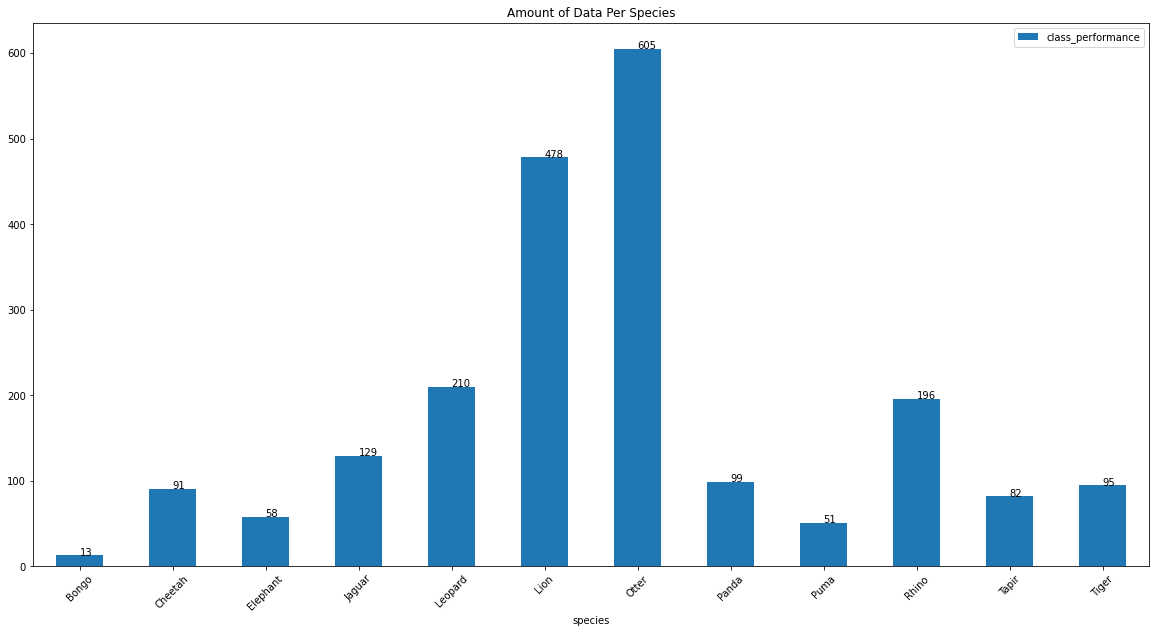

In [6]:
import matplotlib.pyplot as plt

species_dist = training_ds[['species','class_performance']].groupby(['species']).count()
fig, ax = plt.subplots(figsize=(20,10))
species_dist.plot(kind = 'bar', ax=ax)
plt.title('Amount of Data Per Species')

for index, row in species_dist.reset_index().iterrows():
  plt.text(index, row["class_performance"], row["class_performance"])

plt.xticks(rotation = 45)
plt.show()

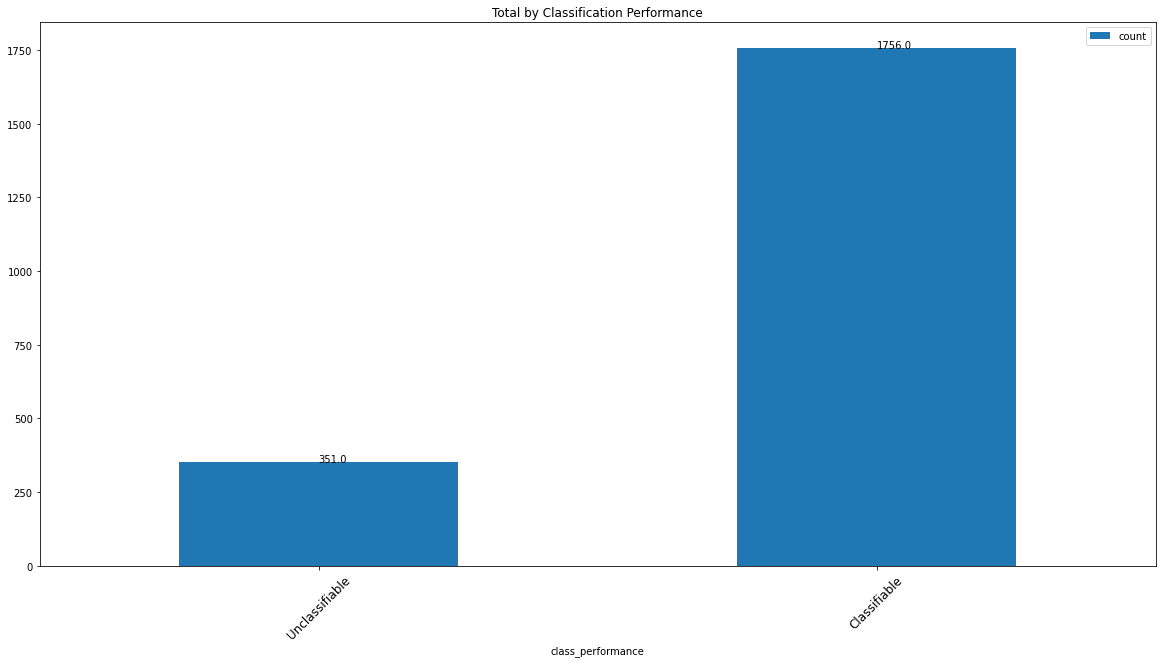

In [7]:
# what are the total number of images that could actually be classified vs ones tht could not?
class_dist = (training_ds[['subj_score','class_performance']].groupby(['class_performance'])).size().reset_index(name='count') 
class_dist = class_dist.pivot_table(index='class_performance', values='count')
fig, ax = plt.subplots(figsize=(20,10))
class_dist.plot(kind = 'bar', ax=ax)

for index, row in class_dist.reset_index().iterrows():
  plt.text(index, row["count"], row["count"])

ax.set_xticklabels(['Unclassifiable','Classifiable'], fontsize=12)
plt.xticks(rotation = 45)
plt.title('Total by Classification Performance')
plt.show()

As demonstrated in the charta above we definitely have imbalanced data with most images able to classify, with approximately 83.3% of images able to classify vs 16.6% unable to classify.  Also species are imbalanced, with Otters and Lions taken the majority of the dataset.

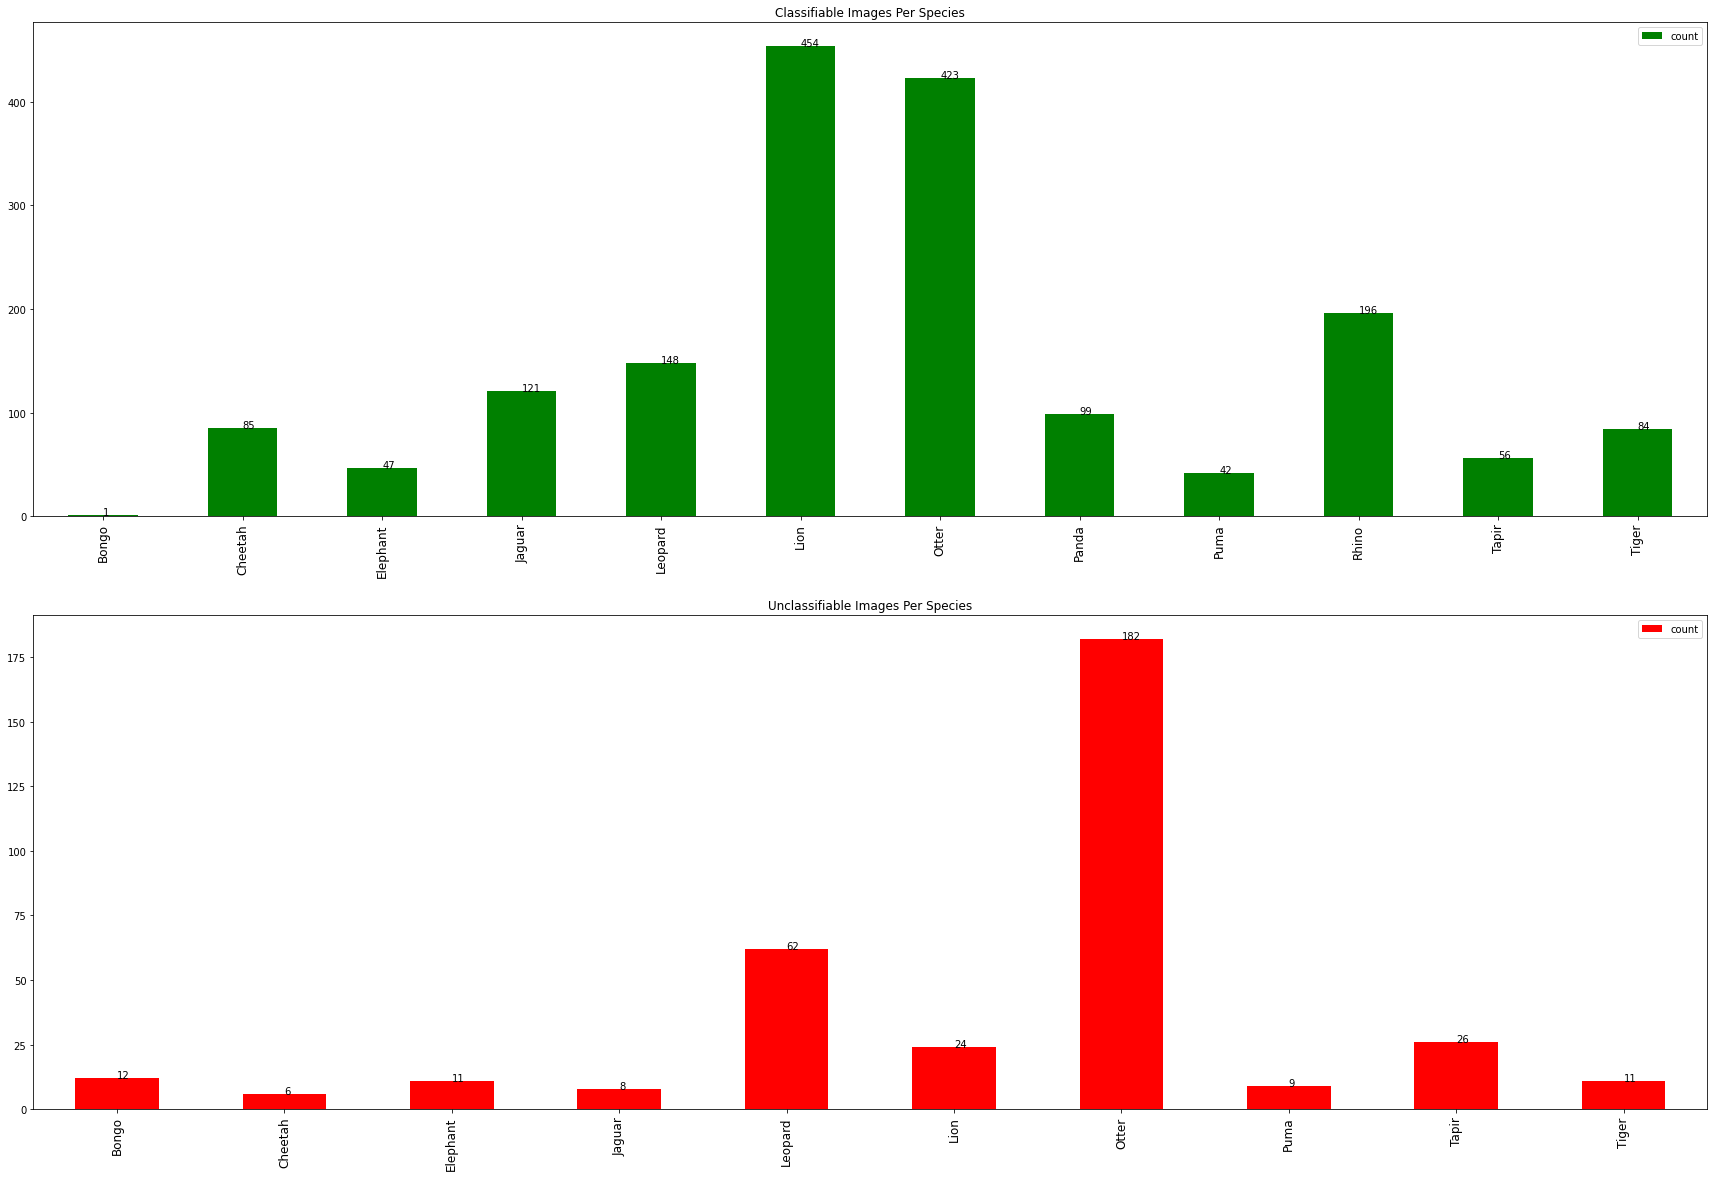

In [8]:
species_performance = (training_ds[['species','class_performance','image_location']].groupby(['species','class_performance'])).size().reset_index(name='count')
species_classifiable = species_performance[species_performance['class_performance'] == 1]
species_unclassifiable = species_performance[species_performance['class_performance'] == 0]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
species_classifiable[["species","count"]].plot(ax=axes[0], kind='bar', color=['green'])
species_unclassifiable[["species","count"]].plot(ax=axes[1], kind='bar', color=['red']);
axes[0].set_xticklabels(species_classifiable["species"], fontsize=12)
axes[1].set_xticklabels(species_unclassifiable["species"], fontsize=12)
axes[0].set_title("Classifiable Images Per Species")
axes[1].set_title("Unclassifiable Images Per Species")

for index, row in species_classifiable.reset_index().iterrows():
  axes[0].text(index, row["count"], row["count"])

for index, row in species_unclassifiable.reset_index().iterrows():
  axes[1].text(index, row["count"], row["count"])


plt.show()

In [9]:
import numpy as np
merged_species_class_performance = species_classifiable.merge(species_unclassifiable, on='species' , how="left").fillna(0)

merged_species_class_performance['percent_classifiable'] = merged_species_class_performance['count_x'] / (merged_species_class_performance['count_x'] + merged_species_class_performance['count_y'])
merged_species_class_performance['percent_unclassifiable'] = 1-  merged_species_class_performance['percent_classifiable']

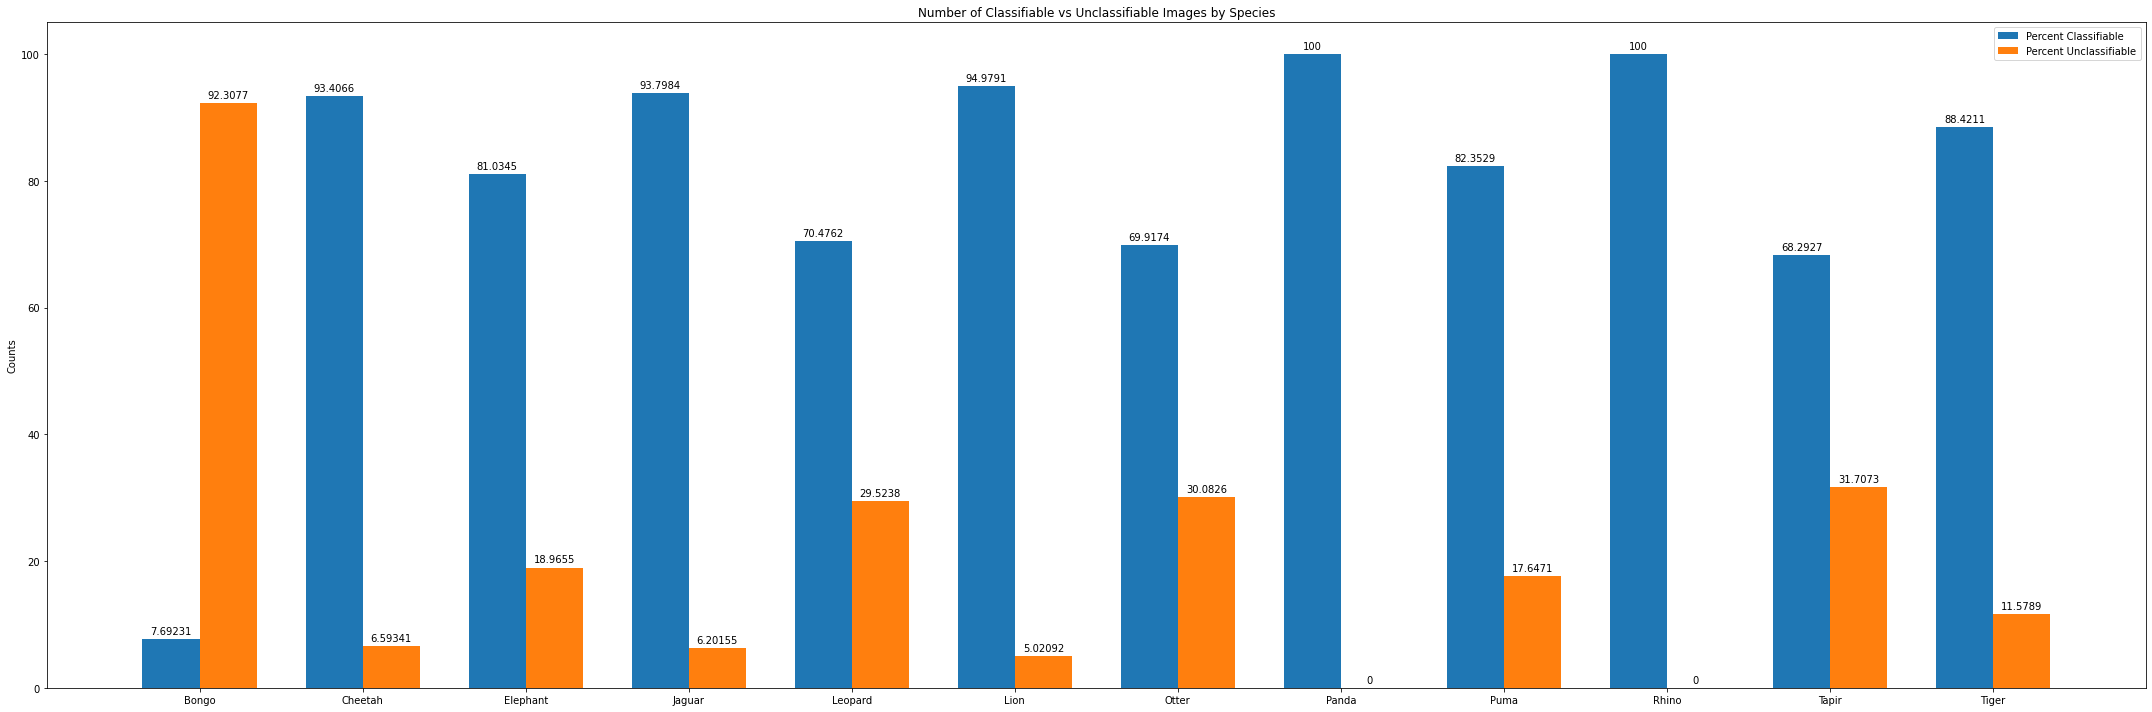

In [10]:
import warnings
warnings.filterwarnings("ignore")

labels = merged_species_class_performance['species']
percent_classifiable = merged_species_class_performance['percent_classifiable'] * 100
percent_unclassifiable = merged_species_class_performance['percent_unclassifiable'] * 100

x = np.arange(len(labels)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(x - width/2, percent_classifiable, width, label='Percent Classifiable')
rects2 = ax.bar(x + width/2, percent_unclassifiable, width, label='Percent Unclassifiable')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Number of Classifiable vs Unclassifiable Images by Species')

ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()


###Subjective Score Classification Report - Overall

We will now look to determine how well subjective scores overall did in determining whether an image can or cannot be classified. This will be used as a base model to compare against other prediction models

In [11]:
from sklearn.metrics import confusion_matrix , roc_auc_score, roc_curve, auc, classification_report, average_precision_score, precision_recall_curve

subjective_predictions = training_ds['sub_score_norm']
class_performance = training_ds['class_performance']

print(classification_report(class_performance, subjective_predictions))

              precision    recall  f1-score   support

         0.0       0.17      0.29      0.21       351
         1.0       0.83      0.71      0.77      1756

    accuracy                           0.64      2107
   macro avg       0.50      0.50      0.49      2107
weighted avg       0.72      0.64      0.68      2107



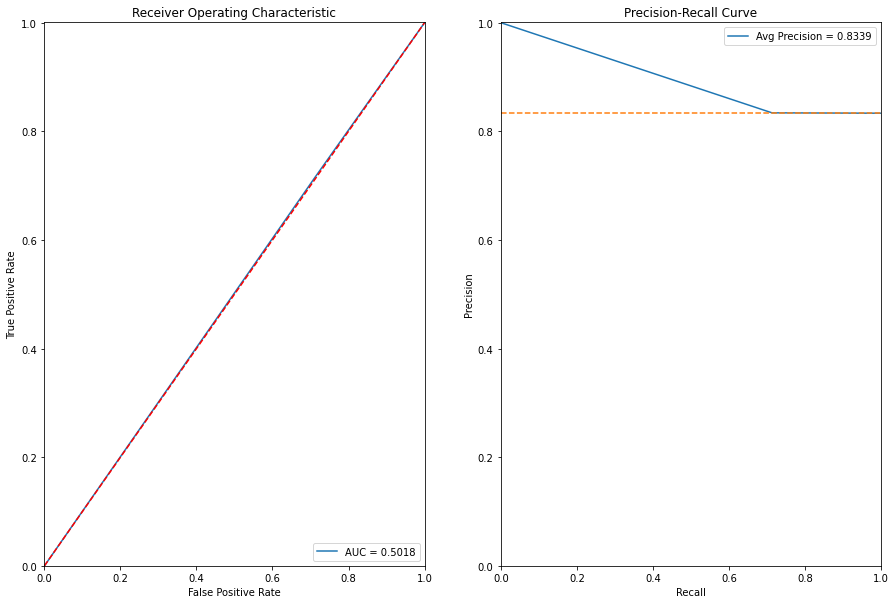

In [12]:
fpr, tpr, thresholds = roc_curve(class_performance, subjective_predictions)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(class_performance, subjective_predictions)
avg_pr = average_precision_score(class_performance, subjective_predictions)

no_skill = len(class_performance[class_performance==1]) / len(class_performance)

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].set_title('Receiver Operating Characteristic')
axs[0].plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
axs[0].legend(loc='lower right')
axs[0].plot([0,1],[0,1],'r--')
axs[0].set_xlim([-0.001, 1])
axs[0].set_ylim([0, 1.001])
axs[0].set_ylabel('True Positive Rate')
axs[0].set_xlabel('False Positive Rate')

axs[1].set_title('Precision-Recall Curve')
axs[1].plot(recall, precision, label='Avg Precision = %0.4f'% avg_pr)
axs[1].legend(loc='upper right')
axs[1].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
axs[1].set_xlim([-0.001, 1])
axs[1].set_ylim([0, 1.001])
axs[1].set_ylabel('Precision')
axs[1].set_xlabel('Recall')
plt.show();

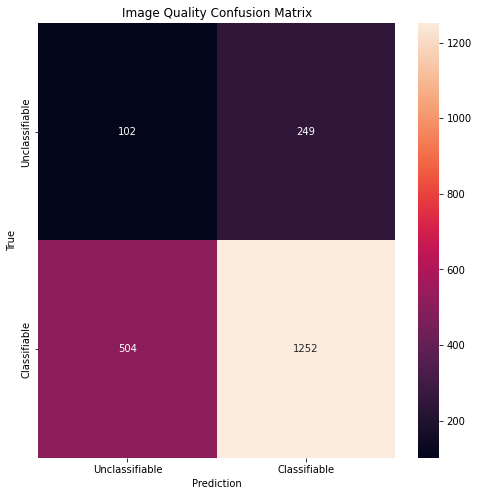

In [13]:
import seaborn as sns
labels = ["Unclassifiable","Classifiable"]
conf_matrix = confusion_matrix(class_performance,subjective_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Image Quality Confusion Matrix")
plt.ylabel('True')
plt.xlabel('Prediction')
plt.show()

Overall, subjective scores have a greater ability to determine a whehter an image will be classifiable (is a good quality) vs whether an image icannot be classified (is of poor quality).  This is evident in the precision measure for predicting unclassifable images (noted as 0 in the classification matrix) which shows that when predicting that an images is unclassifiable subjective scores are only correct 17% of the time.  And out of the total number of actual images that cannot be classified human reviewers only get 29% of those accurately.  This is further supported in the confusion matrix which shows out of 606 images which were predicted as unclassifiable, 102 were truly unclassifiable (17%).  Also where there were truly 351 images that could not be classified, only 102 were predicted as such (29%).


###Subjective Score Classification - Per Species

In [14]:
cols = training_ds['species'].unique()

for idx, col in enumerate(cols):
  
  subjective_predictions = training_ds[training_ds['species'] == col ]['sub_score_norm']
  class_performance = training_ds[training_ds['species'] == col ]['class_performance']

  print("Classification report for species - " + col )
  print(classification_report(class_performance, subjective_predictions))
  print('\n' )

Classification report for species - Leopard
              precision    recall  f1-score   support

         0.0       0.31      0.53      0.39        62
         1.0       0.72      0.51      0.60       148

    accuracy                           0.51       210
   macro avg       0.52      0.52      0.49       210
weighted avg       0.60      0.51      0.54       210



Classification report for species - Rhino
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.88      0.94       196

    accuracy                           0.88       196
   macro avg       0.50      0.44      0.47       196
weighted avg       1.00      0.88      0.94       196



Classification report for species - Otter
              precision    recall  f1-score   support

         0.0       0.25      0.30      0.27       182
         1.0       0.67      0.61      0.64       423

    accuracy                           0.52       

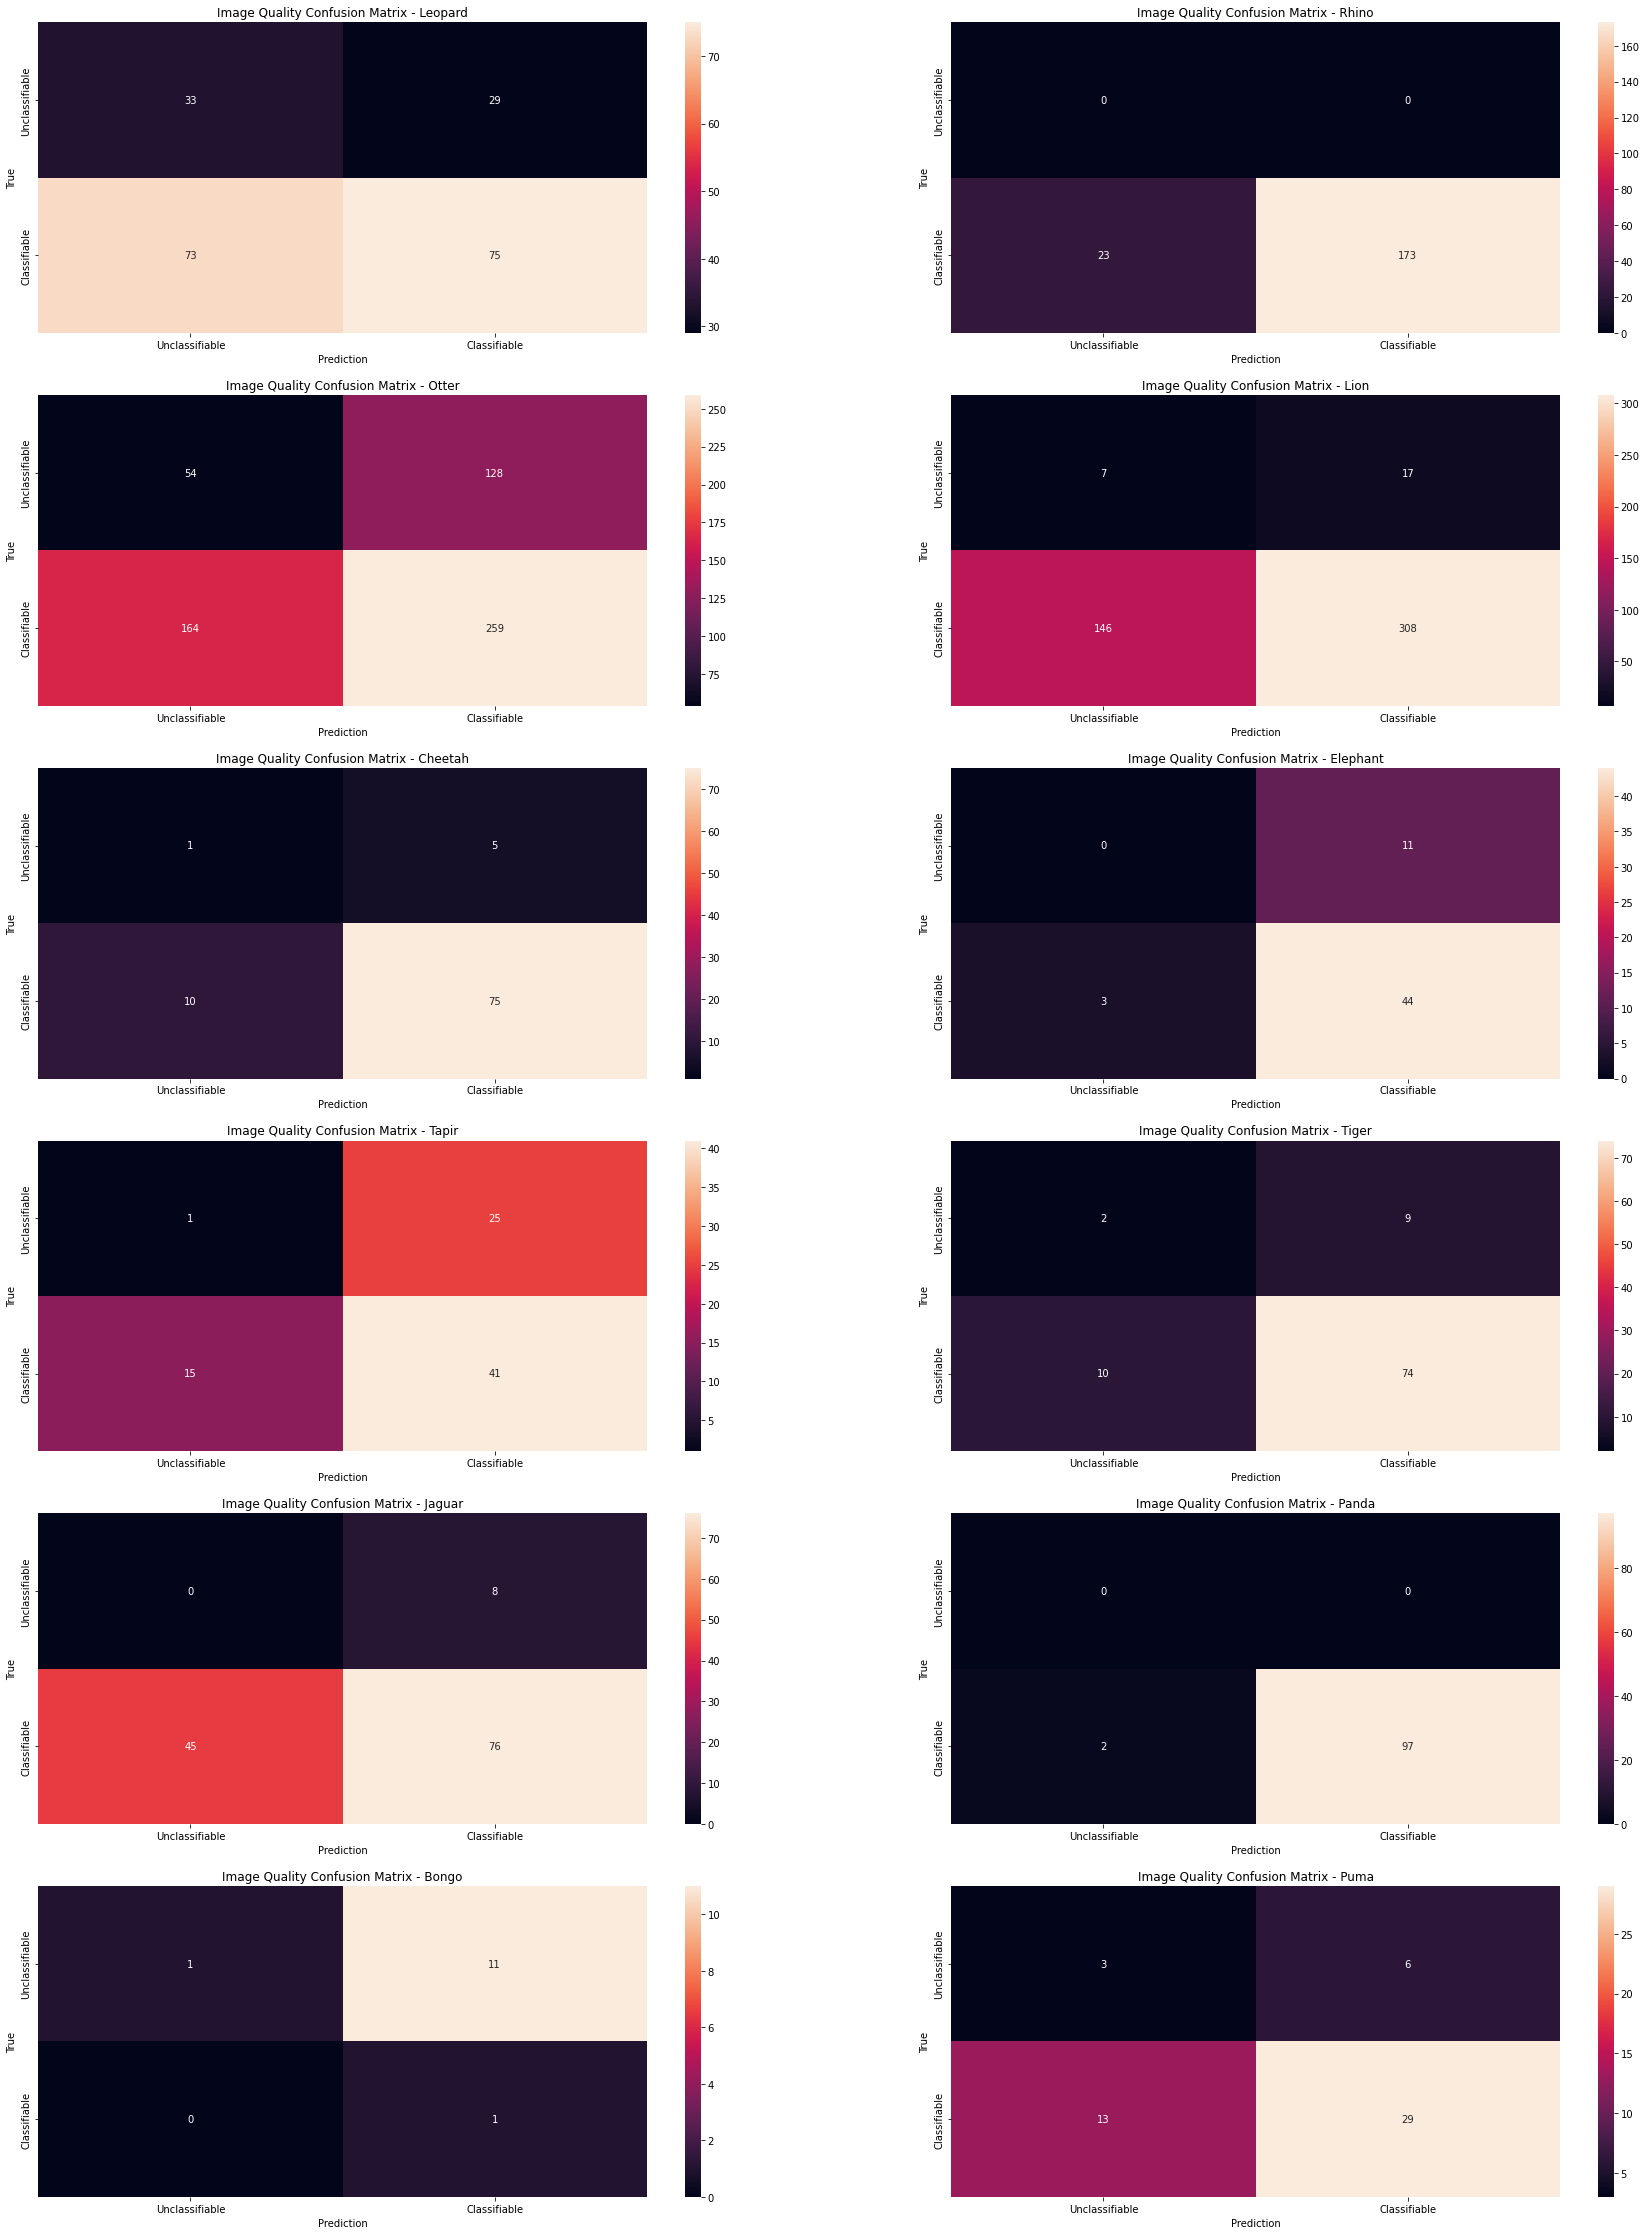

In [15]:
fig, axs = plt.subplots(6, 2, figsize=(30,40))
labels = ["Unclassifiable","Classifiable"]

for idx, col in enumerate(cols):
  
  subjective_predictions = training_ds[training_ds['species'] == col ]['sub_score_norm']
  class_performance = training_ds[training_ds['species'] == col ]['class_performance']

  column = 0 if idx % 2 == 0 else 1
  row = idx // 2
  
  conf_matrix = confusion_matrix(class_performance,subjective_predictions)
  g = sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", ax=axs[row][column]);
  axs[row][column].title.set_text("Image Quality Confusion Matrix - " + col)
  axs[row][column].set_ylabel('True')
  axs[row][column].set_xlabel('Prediction')

The above demonstrates the challenges specifically when making a prediction that an image is unclassifiable.  In many cases, including  Otters, Lions, Leopard data, there was a high rate of prediction of unclassifiable images that could be classified.  The goal of our machine leaning model will to improve prediction of unclassifiable data whlie not sacrificing classifiable prediction accruracy, given this imbalanced dataset.

## Image Feature Analysis

Now that we understand the specific areas of concern let's evaluate for any visual or non-visual/measurable differences between imaages whose subjective score accurately predicted classification performance vs those where the score was not accurate.

### Non-Visual Feature Evaluation

We will first review niqe, piqe, brightness, blurriness, and size measures  to determine if there is anything discernable correlations between subjective scores and actual classification performance

In [16]:
analysis_columns = ['n_score', 'p_score', 'brightness', 'blurriness', 'size', 'subj_score', 'class_performance']
feature_columns = ['n_score', 'p_score', 'brightness', 'blurriness', 'size']

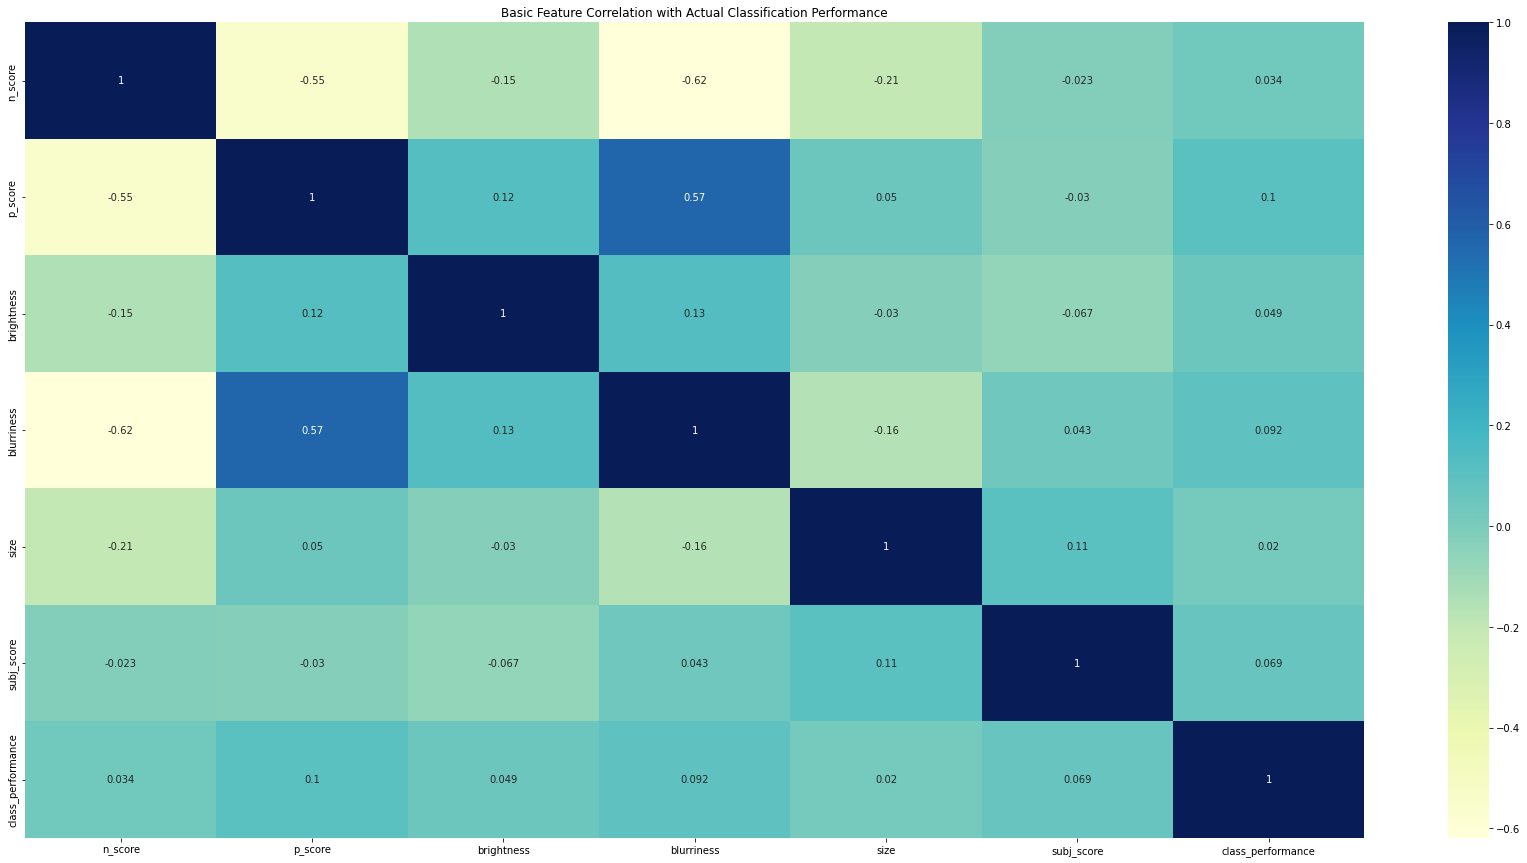

In [17]:
non_visual_ds = training_ds[analysis_columns]
fig, ax = plt.subplots(figsize=(30,15))
dataplot = sns.heatmap(non_visual_ds.corr(), cmap="YlGnBu", annot=True, ax=ax)
ax.title.set_text("Basic Feature Correlation with Actual Classification Performance")
  

One interesting note in the above is the influence of image size on a higher subjevtive score, even though original image size is not influential in the model (which makes sense due to resizing).  This may be a hint that scorers should not be so focused on if the size of the image provided is larger than others.

Also level or brightness should be paid more attention to.  It sees as if increased brightness has a slight decreasing effect on the subjective score, however brightness is influential in increasing classification ability.

Blurriness measure is however interesting.  In the case of blurriness, increased variance detected in an image positively influences both subjective scores and actual classification performance.  One thing to contemplate if it happens that the same equipment was used to captures and categorize an image. Same equipment used for a given species, especially if not high quality, could lead to a trend in certain cases.  This is not something easily controlled however can be highlighted in how models may be learning details.


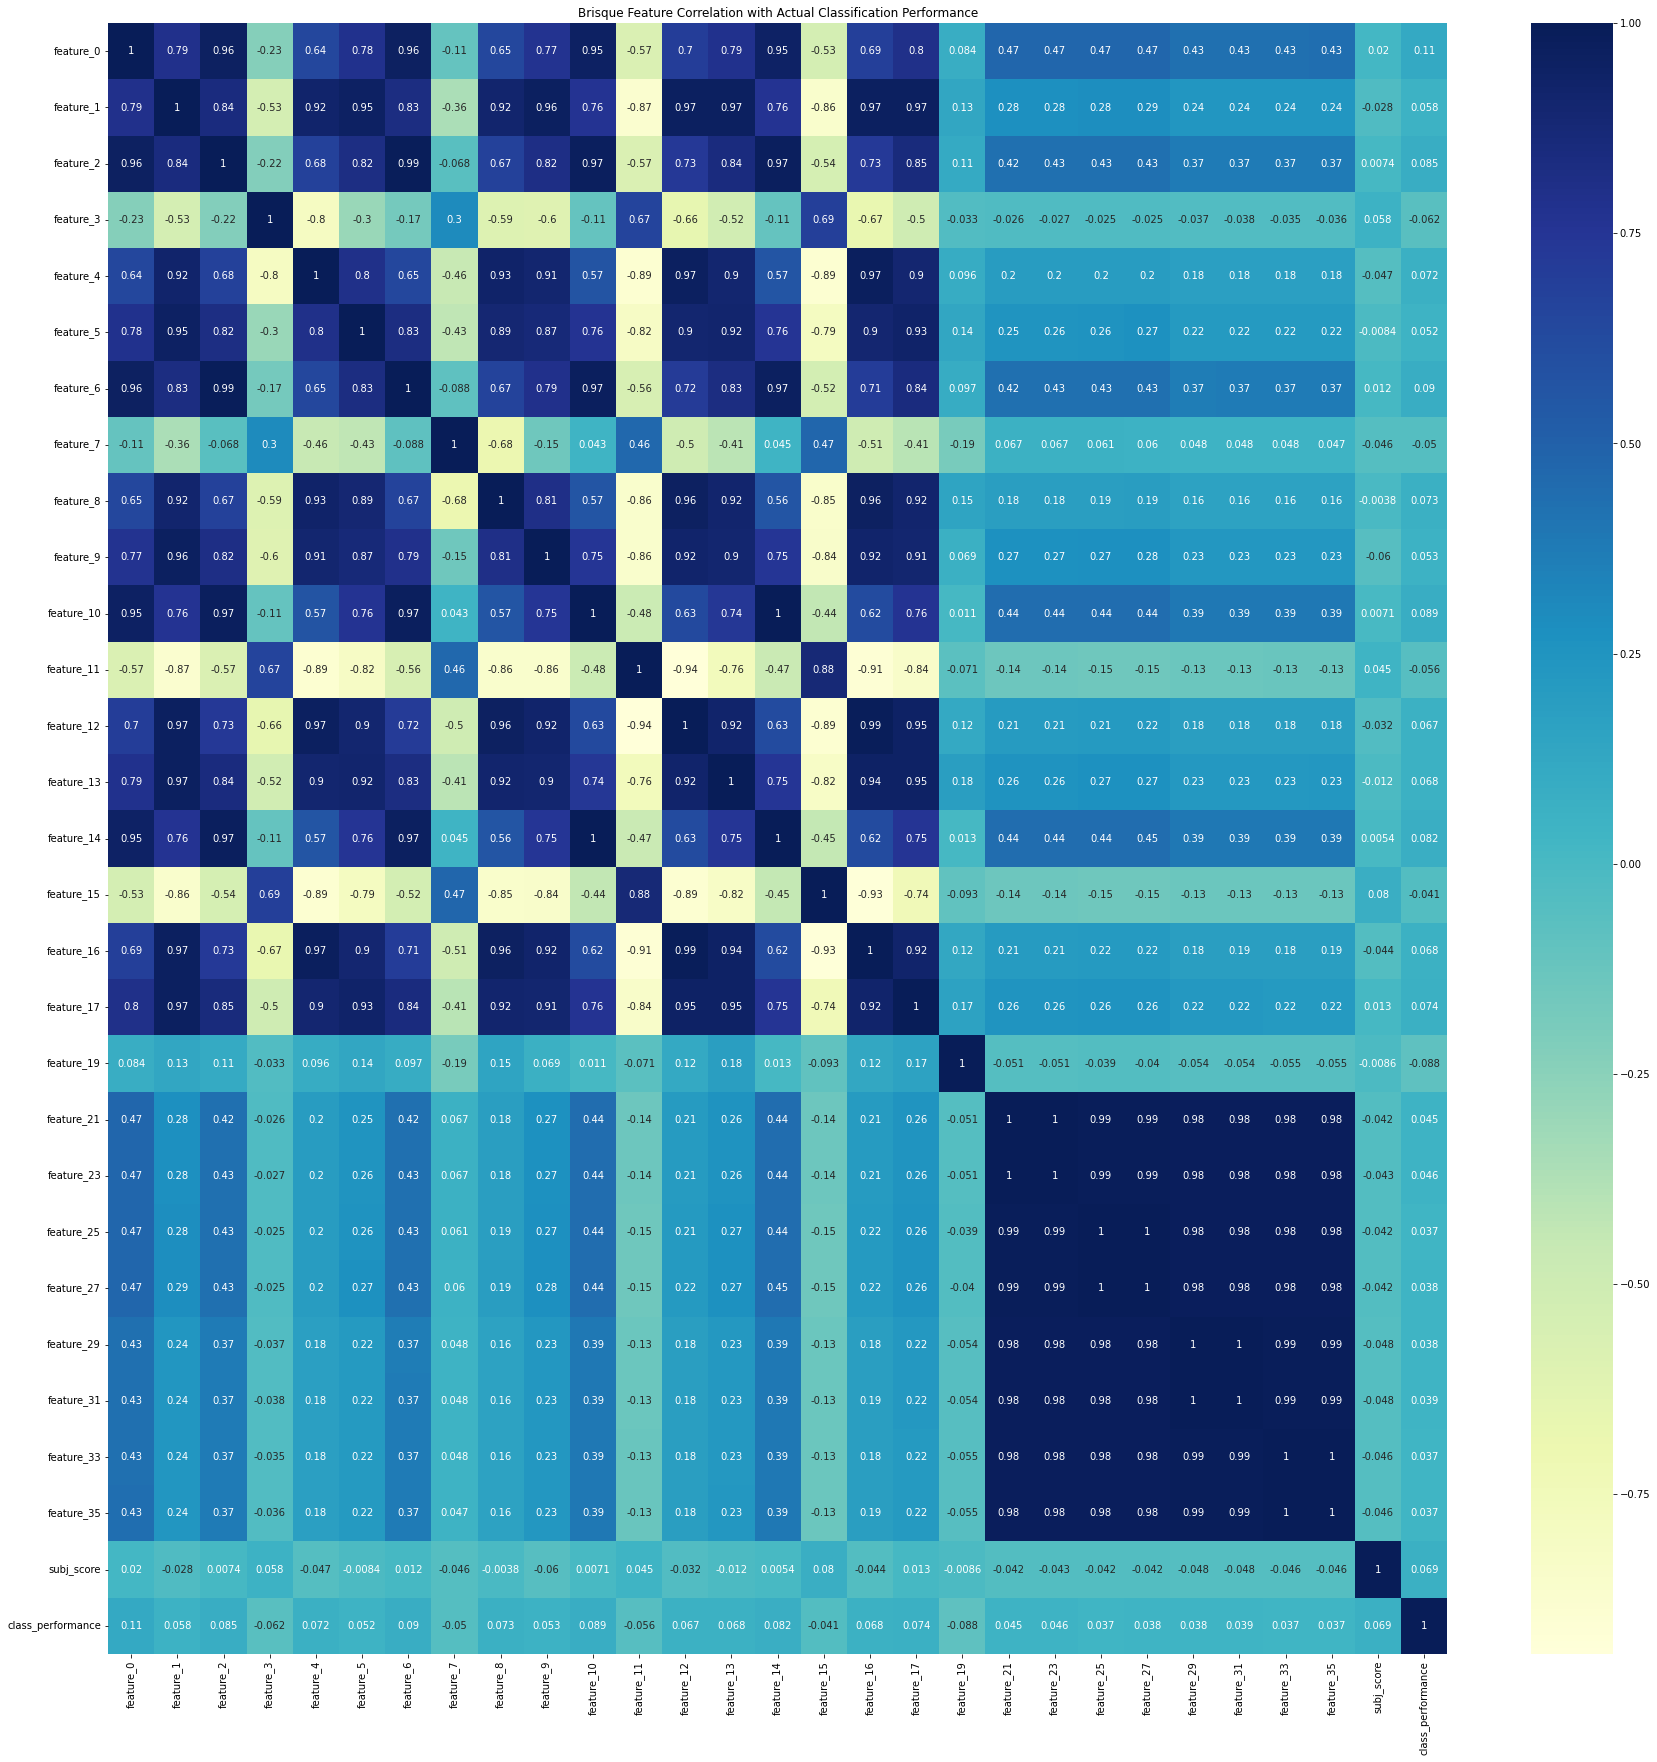

In [18]:
# compares scores against BRISQUE measures
brisque_columns = ['feature_'+str(i) for i in range(0, 36)]
brisque_columns = brisque_columns + ['subj_score','class_performance']

non_visual_ds_brisque = training_ds[brisque_columns]
#removed previously discovered nan after corr
non_visual_ds_brisque.drop(columns=['feature_18','feature_20', 'feature_22', 'feature_24', 'feature_26', 'feature_28', 'feature_30', 'feature_32', 'feature_34'], inplace=True)

fig, ax = plt.subplots(figsize=(30,30))
dataplot = sns.heatmap(non_visual_ds_brisque.corr(), cmap="YlGnBu", annot=True, ax=ax)
ax.title.set_text("Brisque Feature Correlation with Actual Classification Performance")

The matrix above are more complex meaasures, used to derive the brisque score, which helps to identify level of distortion in an image of a natural scene.

From https://learnopencv.com/image-quality-assessment-brisque/
"The distribution of pixel intensities of natural images differs from that of distorted images. This difference in distributions is much more pronounced when we normalize pixel intensities and calculate the distribution over these normalized intensities"

These are less easily to compare with what a human reviewer is seeing however correlations here will be helpful in model training using brisque.

### Visual Feature Evaluation

Now we will take a small sample and visually review some of the misclassified images as well as produce exports for further study. Exports can be downloaded from the temporary directory.

In [19]:
# Generate lists of misclassified images
sub_low_actual_high = training_ds[training_ds["sub_score_norm"] == 0][training_ds["class_performance"] == 1] # images deemed as low quality yet could be classified by model
sub_high_actual_low = training_ds[training_ds["sub_score_norm"] == 1 ][training_ds["class_performance"] == 0] # images deemed as high quality yet could not be classified by model

Image Export

In [21]:
import os
misc_dir = '/content/misclassified_images'

if not os.path.exists(misc_dir):
    os.mkdir(misc_dir)

In [22]:
# Exporting misclassified images
# images where subjective scored low but actual classification said it was classifiable
import shutil

dst_dir =  misc_dir + '/sub_low_actual_high'

if not os.path.exists(dst_dir):
    os.mkdir(dst_dir)

for idx, row in sub_low_actual_high.iterrows():
  folder = dst_dir + '/' + row['species'] + '_' + str(row['subj_score'])
  if not os.path.exists(folder):
    os.mkdir(folder)
  
  cp_img = row['image_location'] + '/' + row['image_name']
  new_img = folder + '/' + row['image_name']
  shutil.copy(cp_img,new_img )

In [23]:
 # images where subjective scored high but actual classification said it was not classifiable
dst_dir = misc_dir + '/sub_high_actual_low'

if not os.path.exists(dst_dir):
    os.mkdir(dst_dir)

for idx, row in sub_high_actual_low.iterrows():
  folder = dst_dir + '/' + row['species'] + '_' + str(row['subj_score'])
  if not os.path.exists(folder):
    os.mkdir(folder)
  
  cp_img = row['image_location'] + '/' + row['image_name']
  new_img = folder + '/' + row['image_name']
  shutil.copy(cp_img,new_img )

In [24]:
shutil.make_archive('misclassified_images', 'zip', misc_dir)

'/content/misclassified_images.zip'

**Image Sample Display**

In [25]:
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO

import pandas as pd
import glob
import random
import base64
import io

def get_thumbnail(path):
    i = Image.open(path)  
    i = i.resize((512,512))  
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


misclassed_high = sub_high_actual_low[['image_location','species','animal_class','subj_score','image_name']].head(10)
misclassed_low = sub_low_actual_high[['image_location', 'species','animal_class','subj_score','image_name']].head(10)

for i, row in misclassed_high.iterrows():
    img_path = row['image_location'] +'/' + row['image_name'] 
    misclassed_high.at[i,'image_html'] =  image_formatter(img_path)

for i, row in misclassed_low.head(10).iterrows():
    img_path = row['image_location'] +'/' + row['image_name'] 
    misclassed_low.at[i,'image_html'] =  image_formatter(img_path)
  

misclassed_high.sort_values(by=['species'],inplace=True)  
misclassed_low.sort_values(by=['species'],inplace=True)

### Images Misclassified as High Quality

,image_location,species,animal_class,subj_score,image_name,image_html
55,/content/RAW/Bongo_Eastern_Mountain_4,Bongo,Eastern Mountain,4,60209376d3dd11ea91590242ac1c0002_.jpg,
52,/content/RAW/Jaguar_4,Jaguar,Unknown,4,74e94b4ac0b811eb813200155da81a1d_.jpg,
0,/content/RAW/Leopard_African_5,Leopard,African,5,e49aba64d63011eab2300242ac1c0002_.jpg,
4,/content/RAW/Leopard_African_4,Leopard,African,4,ed723f9cc0f811ea82a50242ac1c0002_.jpg,
9,/content/RAW/Otter_Eurasian_4,Otter,Eurasian,4,e1e72a160db011eb9d950242ac110002_.jpg,
13,/content/RAW/Otter_Eurasian_4,Otter,Eurasian,4,47f776c8c0fc11ea82a50242ac1c0002_.jpg,
27,/content/RAW/Otter_Eurasian_4,Otter,Eurasian,4,e75c11a2340f11eb96de00155dea8389_.jpg,
44,/content/RAW/Otter_Eurasian_4,Otter,Eurasian,4,5402fd54366b11eb904c00155d6591bd_.jpg,
66,/content/RAW/Otter_Eurasian_5,Otter,Eurasian,5,ac39ba66373411eb95a500155d4144f4_.jpg,
71,/content/RAW/Puma_4,Puma,Unknown,4,b076075cd3dd11ea91590242ac1c0002_.jpg,

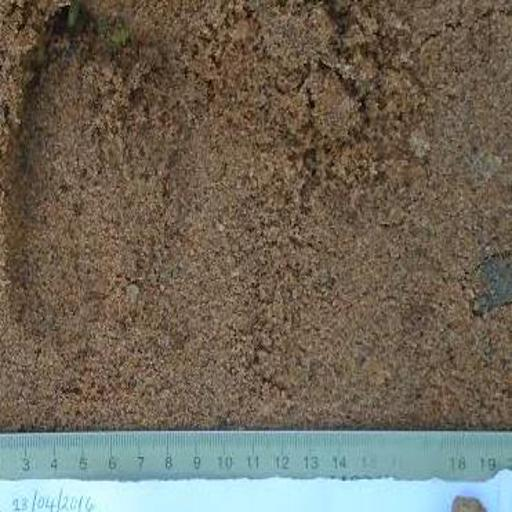
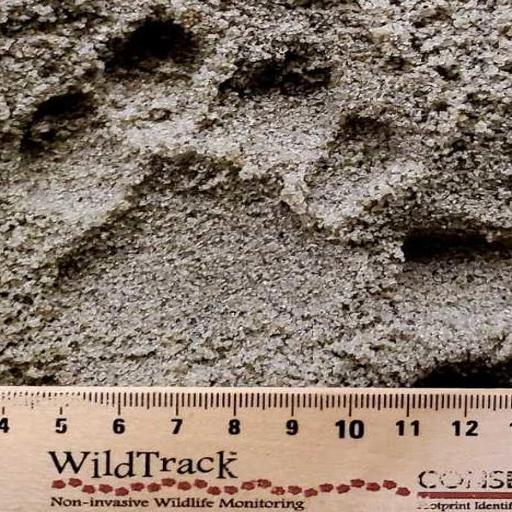
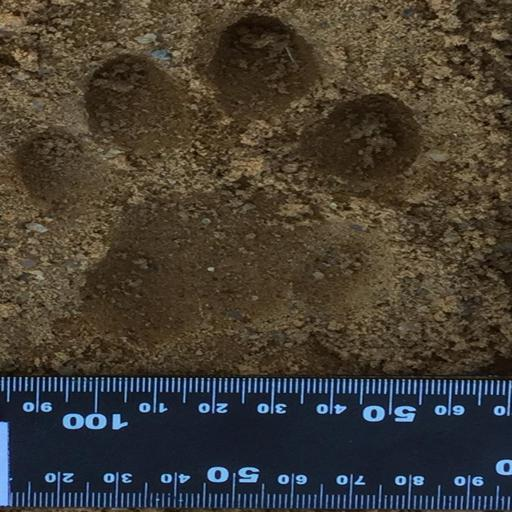
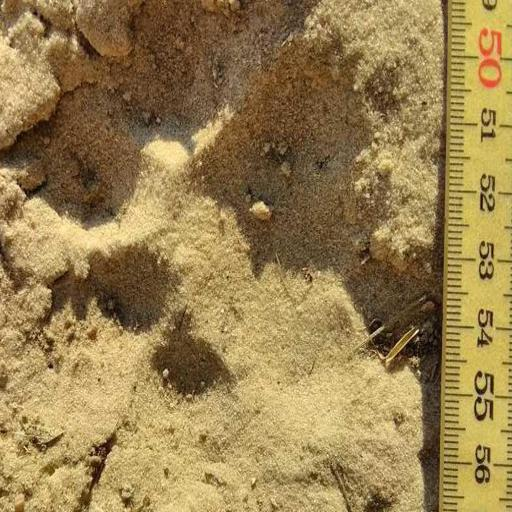
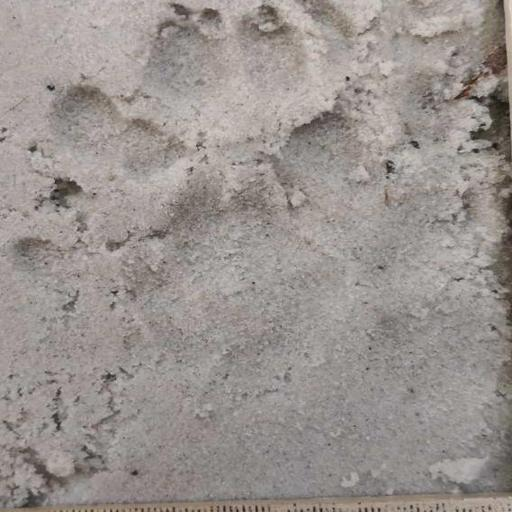
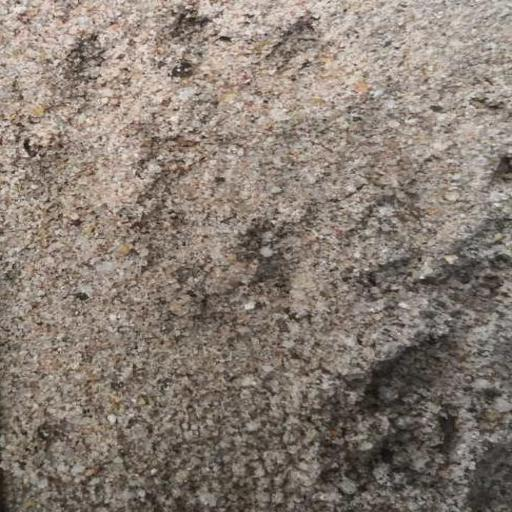
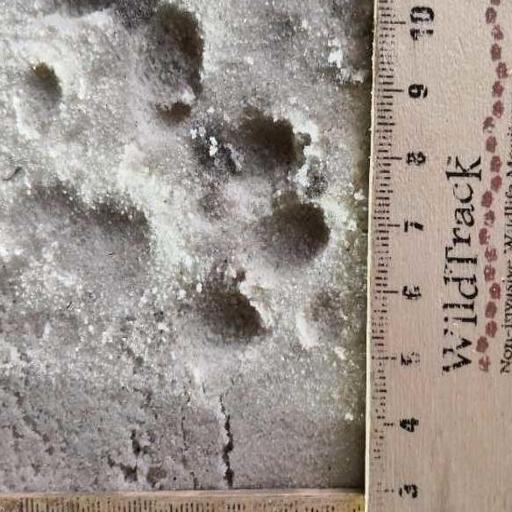
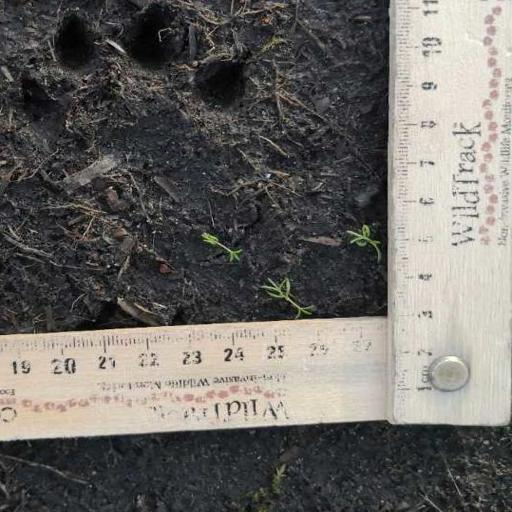
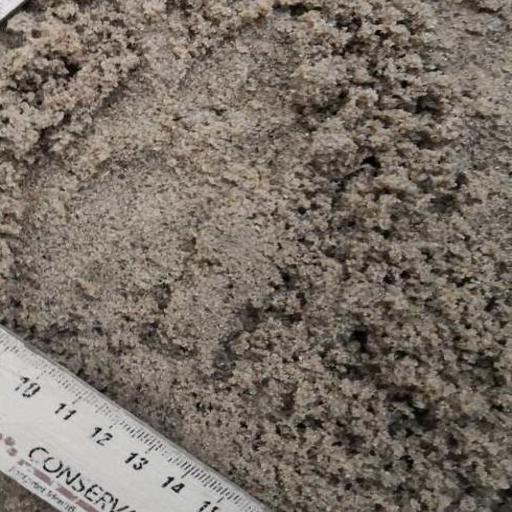
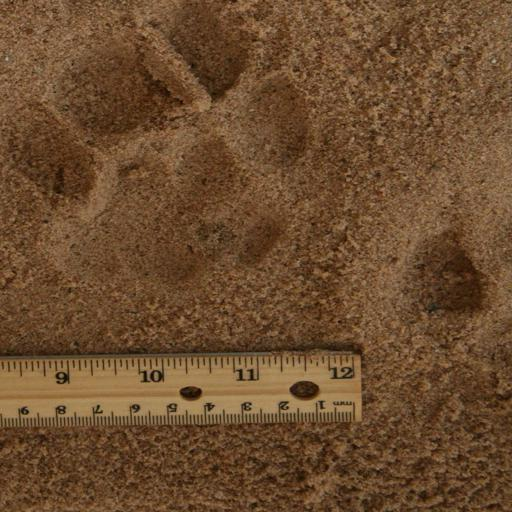

In [26]:
#sample first 10 images for review
high_html = misclassed_high.to_html(escape=False)
display(HTML(high_html))

In the example of African lions (same goes from African Leopards), it seems images with high brightness/exposure tends to be harder to classify. On the contrary images where darker tones are more classifiable.


### Images Misclassified as Low Quality

,image_location,species,animal_class,subj_score,image_name,image_html
17,/content/RAW/Lion_African_3,Lion,African,3,17883c5cd38a11eab34b0242ac110002_.jpg,
19,/content/RAW/Lion_African_3,Lion,African,3,02db729acf6811eaafe50242ac110002_.jpg,
25,/content/RAW/Lion_African_3,Lion,African,3,b8eb1142a69711eb934200155d5a828c_.jpg,
29,/content/RAW/Lion_African_3,Lion,African,3,5eaf0384c0f911ea82a50242ac1c0002_.jpg,
6,/content/RAW/Otter_Eurasian_3,Otter,Eurasian,3,da0b7ad209c211eb9d950242ac110002_.jpg,
7,/content/RAW/Otter_Eurasian_3,Otter,Eurasian,3,77722e7cc0fa11ea82a50242ac1c0002_.jpg,
22,/content/RAW/Otter_Eurasian_3,Otter,Eurasian,3,0c29b910d84111eab34b0242ac110002_.jpg,
28,/content/RAW/Otter_Eurasian_3,Otter,Eurasian,3,571e8cbec0fb11ea82a50242ac1c0002_.jpg,
31,/content/RAW/Otter_Eurasian_3,Otter,Eurasian,3,a81215285fac11eb801e00155dd6f431_.jpg,
33,/content/RAW/Tapir_Lowland_3,Tapir,Lowland,3,6ff0833632a311ebbaf80242ac110002_.jpg,

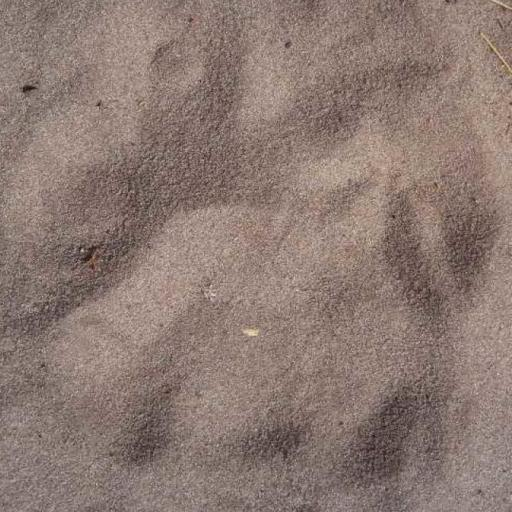
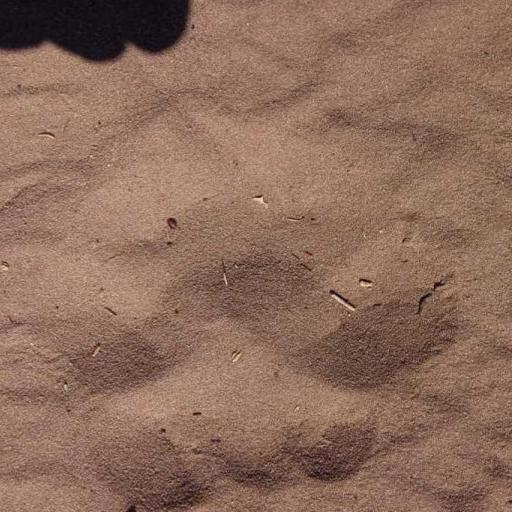
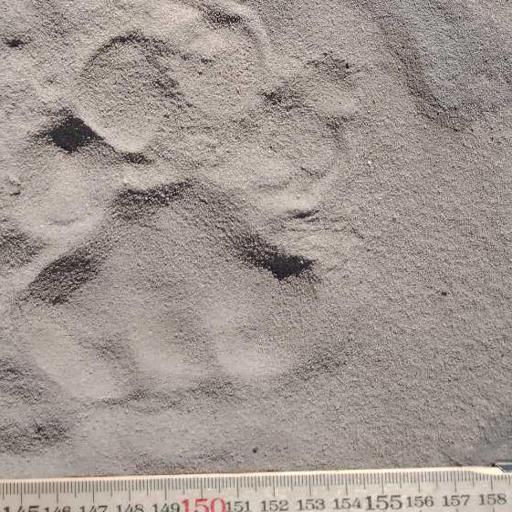
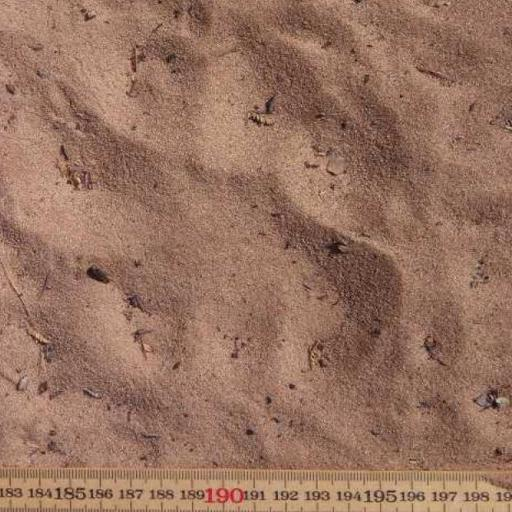
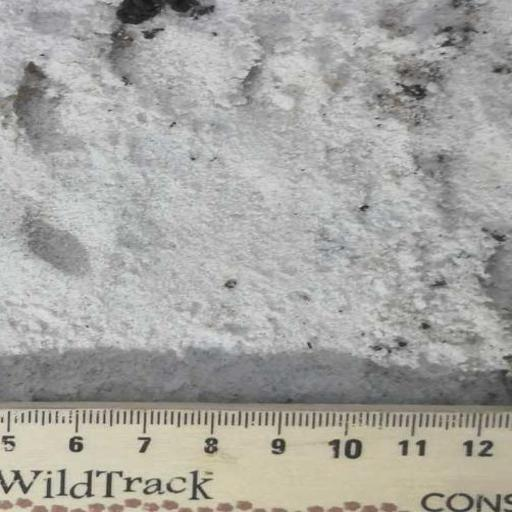
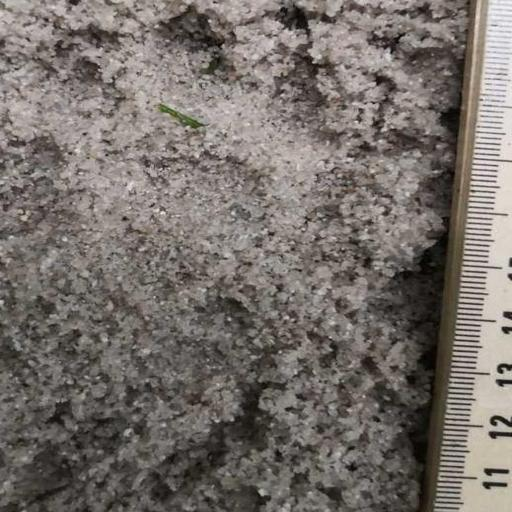
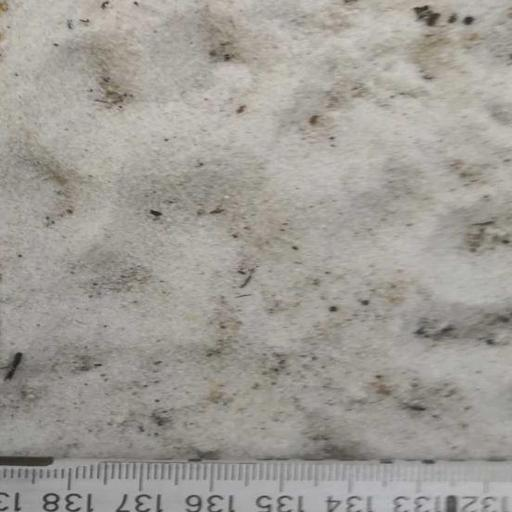
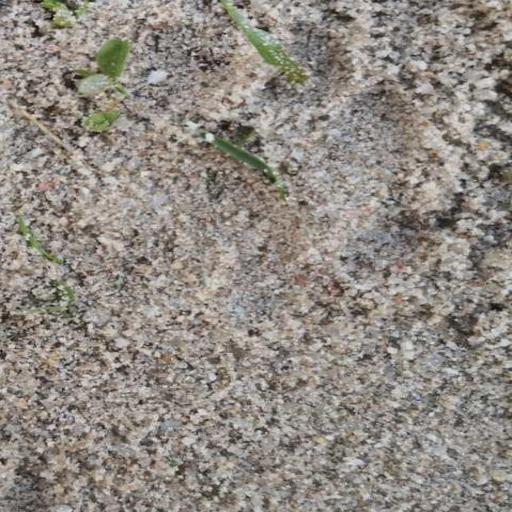
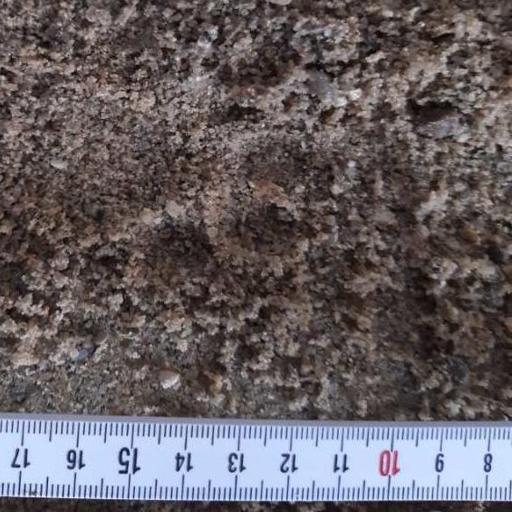
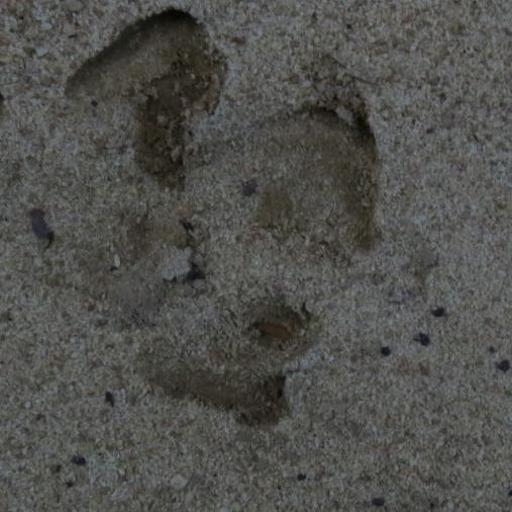

In [27]:
#sample first 10 images for review
low_html = misclassed_low.to_html(escape=False)
display(HTML(low_html))

Visually many of these images do seem low quality however one thought is perhaps they could be classified because of other common things that appea in the image (e.g. same substrate, same ruler, etc)?
